In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import glob
import gseapy as gp
from gprofiler import GProfiler
from goatools import obo_parser
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.preprocessing import deseq2_norm
import pickle

In [2]:
#Data is available in NCBI 
#https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE54308
counts = pd.read_csv('../data/GSE54308_raw_counts_GRCh38.p13_NCBI.tsv', sep='\t') #, index_col=0

anotation = pd.read_csv('../data/anotation_rnaseq.csv', index_col=0) 
gene_anotation = pd.read_table('../data/Human.GRCh38.p13.annot.tsv', index_col=0)
gene_anotation['Symbol'] 

#counts.index = gene_anotation['Symbol'] 
counts = counts.T
counts.columns = counts.iloc[0]
counts = counts[1:]
anotation

/var/folders/05/4pfxtbrs5459ytz3j1jhcgt00000gn/T/ipykernel_55255/1324971011.py:6: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_anotation = pd.read_table('../data/Human.GRCh38.p13.annot.tsv', index_col=0)


,title,geo_accession,cell_type,population,sex
id,,,,,
GSM1312705,HGDP00711,GSM1312705,Lymphoblast cell line,Cambodian,Male
GSM1312706,HGDP00712,GSM1312706,Lymphoblast cell line,Cambodian,Female
GSM1312707,HGDP00713,GSM1312707,Lymphoblast cell line,Cambodian,Female
GSM1312708,HGDP00715,GSM1312708,Lymphoblast cell line,Cambodian,Male
GSM1312709,HGDP00716,GSM1312709,Lymphoblast cell line,Cambodian,Male
GSM1312710,HGDP00720,GSM1312710,Lymphoblast cell line,Cambodian,Male
GSM1312711,HGDP00721,GSM1312711,Lymphoblast cell line,Cambodian,Female
GSM1312712,HGDP00854,GSM1312712,Lymphoblast cell line,Maya,Female
GSM1312713,HGDP00855,GSM1312713,Lymphoblast cell line,Maya,Female


In [56]:
## keeping just samples I have the anotation 
samples_to_keep = counts.index
counts_df = counts.loc[samples_to_keep]
anotation_df = anotation.loc[samples_to_keep]

groups = anotation_df['population'].unique().tolist()
conditions = anotation_df['population'].tolist()
maya = anotation_df[anotation_df['population'] == 'Maya']
mozabite = anotation_df[anotation_df['population'] == 'Mozabite']
mayavsmozabite = pd.concat([maya,mozabite])

samples_to_keep = mayavsmozabite.index
counts_df = counts.loc[samples_to_keep]
anotation_df = anotation.loc[samples_to_keep]
groups = anotation_df['population'].unique().tolist()
conditions = anotation_df['population'].tolist()

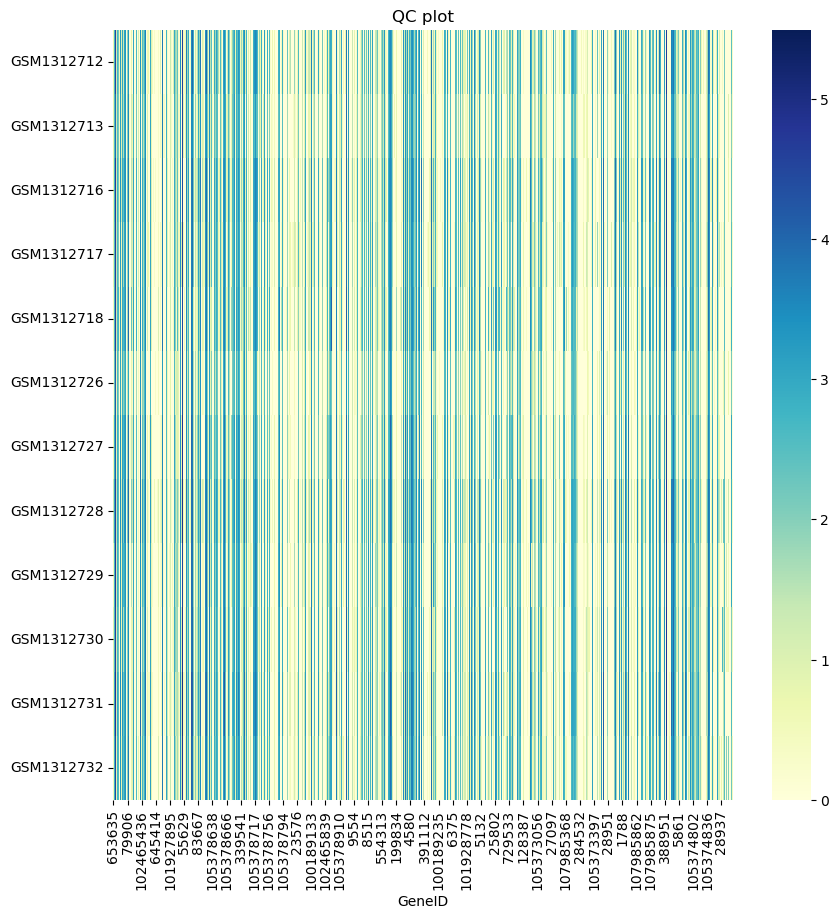

In [57]:
# Perform quality control
# (optional but recommended)
plt.figure(figsize=(10,10))
sns.heatmap(np.log10(1 + counts_df.iloc[:,1:5000]), cmap="YlGnBu", cbar=True)
plt.title("QC plot")
plt.show()

In [58]:
##### ONE WAY TO NORMALIZE 


# Filter low-abundance genes
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

# Normalize counts

# (select one of the following methods)
counts_norm = np.log2(counts_df.T + 1) # log2 normalization
#counts_norm = counts_df.T.divide(counts_df.T.sum(axis=0), axis=1) * 1e6 # TPM normalization

# Perform differential gene expression analysis
# (select one of the following methods)
counts_norm

,GSM1312712,GSM1312713,GSM1312716,GSM1312717,GSM1312718,GSM1312726,GSM1312727,GSM1312728,GSM1312729,GSM1312730,GSM1312731,GSM1312732
GeneID,,,,,,,,,,,,
100287102,3.169925,2.000000,3.321928,3.169925,2.807355,2.584963,3.000000,3.807355,3.459432,2.807355,4.459432,2.807355
653635,8.588715,8.194757,8.569856,8.317413,8.451211,7.451211,9.310613,9.997179,8.599913,8.543032,9.523562,9.108524
102466751,2.321928,2.584963,2.584963,2.807355,1.584963,0.000000,2.000000,4.459432,1.584963,3.169925,2.321928,1.584963
100996442,4.807355,4.000000,4.700440,4.700440,4.523562,2.807355,4.247928,5.087463,3.807355,4.523562,4.247928,4.087463
729737,5.882643,7.189825,7.209453,7.179909,6.339850,4.643856,7.554589,8.144658,6.339850,5.882643,8.569856,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4541,16.483060,14.722274,16.784098,16.207052,16.357140,15.402812,15.519083,16.561989,16.702565,15.914198,16.831975,16.475733
4556,13.508909,11.039605,13.573884,13.170238,12.795431,11.859923,11.460968,13.390975,13.515823,12.940681,14.103616,13.045760
4519,17.664322,16.519037,18.137291,17.563889,17.528294,16.417111,16.783344,17.160334,17.939969,17.298188,17.936327,17.495348


In [78]:
### SECOND WAY TO NORMALIZE


# Normalize counts
counts_norm = deseq2_norm(np.array(counts_df))

# (select one of the following methods)
counts_norm = pd.DataFrame(counts_norm[0])
counts_norm.index = counts_df.index
counts_norm.columns = counts_df.columns
counts_norm = counts_norm.astype(int)
counts_norm

GeneID,100287102,653635,102466751,100996442,729737,102725121,102723897,102465909,112268260,100132287,...,4538,4564,4575,4568,4540,4541,4556,4519,4576,4571
GSM1312712,7,354,3,24,53,0,427,2,9,100,...,405627,913,851,660,185113,84510,10753,191650,3457,5910
GSM1312713,4,438,7,22,217,0,518,3,4,205,...,295421,245,267,229,145059,40627,3162,141160,1220,1403
GSM1312716,6,286,3,18,111,0,403,3,4,176,...,576923,370,493,542,216001,85285,9214,217886,2121,4281
GSM1312717,7,290,5,22,131,0,353,4,8,100,...,421434,962,864,777,156118,69011,8408,176756,3667,5607
GSM1312718,5,336,1,21,77,1,413,2,11,84,...,402234,956,908,850,177834,80901,6850,182184,2098,3198
GSM1312726,10,382,0,13,52,0,498,2,6,61,...,331212,1153,979,949,103803,95165,8163,192229,3290,4914
GSM1312727,8,749,3,21,221,1,843,2,3,150,...,280368,472,491,365,99214,55499,3330,133313,2138,2872
GSM1312728,9,714,14,23,197,2,900,5,6,189,...,243636,1523,1528,1534,105257,67727,7519,102538,2200,3101
GSM1312729,9,364,1,12,75,3,463,0,11,120,...,502571,974,971,639,147956,100371,11022,236650,4148,9627
GSM1312730,5,330,7,19,51,0,400,1,4,54,...,269183,871,804,624,94468,54827,6979,143096,3794,5893


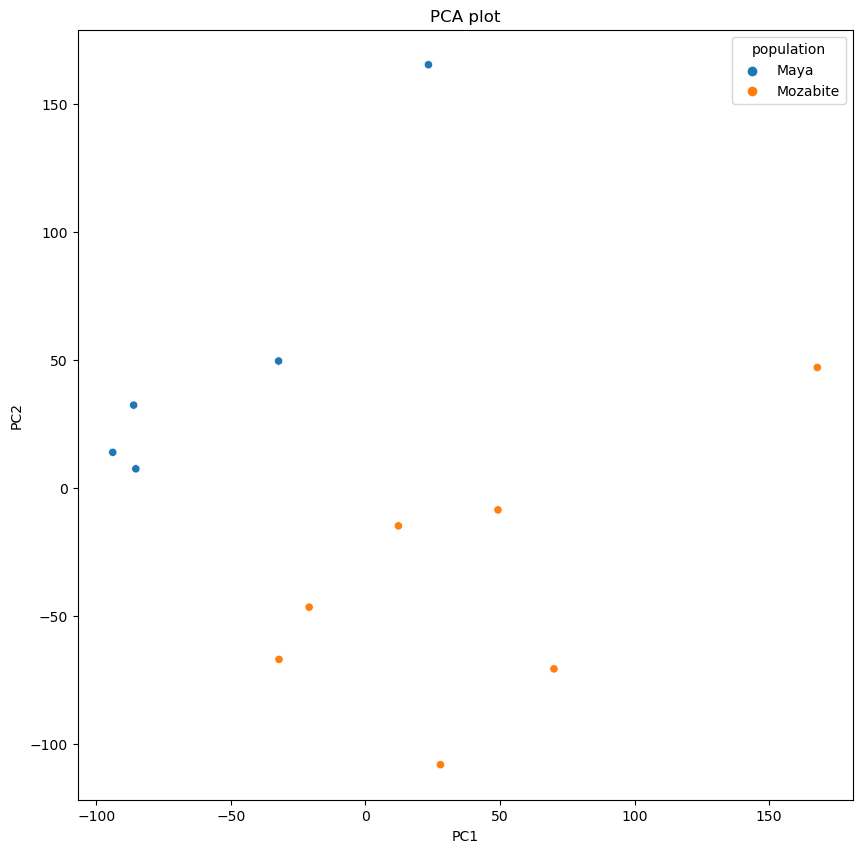

In [79]:
# PCA plot
#counts_norm_T.index.name = "sample_id"
pca = PCA(n_components=2)
pca_result = pca.fit_transform(StandardScaler().fit_transform(counts_norm))
df_pca = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=counts_norm.index)
df_pca['population'] = [conditions[i] for i in range(len(conditions))]
plt.figure(figsize=(10,10))
sns.scatterplot(x="PC1", y="PC2", hue='population', data=df_pca)
plt.title("PCA plot")
plt.show()


In [81]:
dds = DeseqDataSet(
    counts=counts_norm,
    clinical=anotation_df,
    design_factors='population',
    refit_cooks=True,
    n_cpus=8,
)

/Users/luciabazan/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [82]:
dds.deseq2()

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.14 seconds.

Fitting dispersion trend curve...
... done in 2.38 seconds.

Fitting MAP dispersions...
... done in 1.39 seconds.

Fitting LFCs...
... done in 0.82 seconds.

Refitting 444 outliers.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.05 seconds.



In [83]:
print(dds)

AnnData object with n_obs × n_vars = 12 × 24405
    obs: 'title', 'geo_accession', 'cell_type', 'population', 'sex'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_rough_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


In [84]:
print(dds.varm["dispersions"])

[0.24167573 0.08945929 1.06447743 ... 0.06675663 0.11533857 0.19062163]


In [85]:
print(dds.varm["LFC"])

           intercept  population_Mozabite_vs_Maya
GeneID                                           
100287102   1.743478                     0.390342
653635      5.816996                     0.391699
102466751   1.320927                     0.051685
100996442   3.049040                    -0.281867
729737      4.754914                     0.073067
...              ...                          ...
4541       11.170865                     0.057147
4556        8.931556                     0.052531
4519       12.096954                    -0.108180
4576        7.814639                     0.212466
4571        8.299339                     0.225896

[24405 rows x 2 columns]


In [86]:
stat_res = DeseqStats(dds, n_cpus=8)
stat_res

In [67]:
stat_res.summary()

Running Wald tests...
... done in 0.74 seconds.

Log2 fold change & Wald test p-value: population Mozabite vs Maya


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneID,,,,,,
100287102,7.899197,0.477948,0.491239,0.972944,0.330581,0.570457
653635,436.489837,0.567274,0.255287,2.222102,0.026276,0.123365
102466751,4.512533,0.118893,0.796050,0.149353,0.881275,0.946297
100996442,18.842675,-0.401289,0.326580,-1.228763,0.219161,0.449615
729737,123.493743,0.112796,0.542516,0.207912,0.835298,0.922495
...,...,...,...,...,...,...
4541,74532.760542,0.082195,0.241134,0.340869,0.733202,0.865758
4556,7921.225696,0.076250,0.340317,0.224055,0.822715,0.915835
4519,171070.090972,-0.155717,0.219116,-0.710661,0.477294,0.696841


In [88]:
d = stat_res.results_df
d = pd.DataFrame(d)
#d.index = 
#d.sort_values(by='pvalue')
d.index = d.index.astype(int) 
d = d.merge(gene_anotation, left_index=True, right_index=True)
d.sort_values(by='pvalue').head(50)
d#[d['Symbol'] == 'UGT2B17']
#d[d['Symbol'] == 'CLSTN1']
#d[d['Symbol'] == 'FAM20C']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description,Synonyms,GeneType,...,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
GeneID,,,,,,,,,,,,,,,,,,,,,
100287102,7.309235,0.563145,0.528139,1.066282,0.286296,0.525432,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,...,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
653635,429.933201,0.565102,0.256223,2.205509,0.027418,0.126064,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,...,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
102466751,3.863361,0.074565,0.971296,0.076769,0.938807,0.971811,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,...,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
100996442,18.073354,-0.406648,0.346951,-1.172062,0.241172,0.476322,LOC100996442,WAS protein family homolog 2-like,NaN,ncRNA,...,89006,267354,negative,4894,NaN,NaN,NaN,NaN,NaN,NaN
729737,121.289126,0.105413,0.543616,0.193911,0.846246,0.926341,LOC729737,uncharacterized LOC729737,NaN,ncRNA,...,134773,140566,negative,5474,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,73467.308546,0.082445,0.240410,0.342936,0.731647,0.864000,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,...,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
4556,7805.100640,0.075786,0.337154,0.224782,0.822149,0.915112,TRNE,tRNA-Glu,MTTE,tRNA,...,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
4519,168599.189302,-0.156070,0.218272,-0.715028,0.474592,0.693507,CYTB,cytochrome b,MTCYB,protein-coding,...,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...


In [89]:
#print(stat_res.shrunk_LFCs)  # Will be True only if lfc_shrink() was run.


In [90]:
#a = stat_res.lfc_shrink(coeff="population_San_vs_Maya")

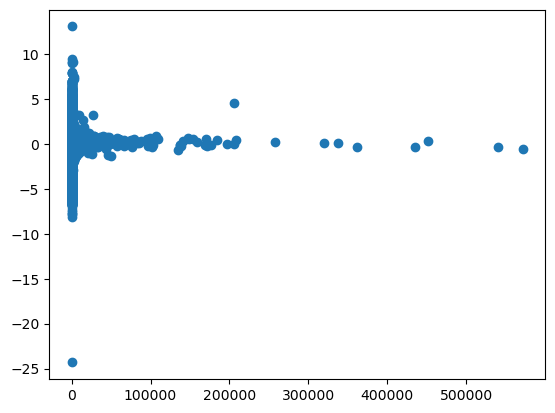

In [91]:
import matplotlib.pyplot as plt
plt.scatter(dds.varm["_normed_means"], d['log2FoldChange'])

In [92]:
vsthg19 = pd.read_csv('vst_574_candidates_gene_anotation.csv')
top50_vsthg19 = vsthg19.sort_values(by='Africa.America', ascending=False).head(50)

vstt2t = pd.read_csv('../data/vst_864_t2t_candidates_gene_anotation.csv', index_col=0)
top50_t2t = vstt2t.sort_values(by='America-Africa', ascending=False).head(50)
top50_t2t

,CHR,START,END,SYMBOL,WestEurasia-Oceania,WestEurasia-America,WestEurasia-Africa,WestEurasia-EastAsia,WestEurasia-SouthAsia,WestEurasia-CentralAsiaSiberia,...,America-Africa,America-EastAsia,America-SouthAsia,America-CentralAsiaSiberia,Africa-EastAsia,Africa-SouthAsia,Africa-CentralAsiaSiberia,EastAsia-SouthAsia,EastAsia-CentralAsiaSiberia,SouthAsia-CentralAsiaSiberia
222,chr12,92893755,92902894,EEA1,0.29638,0.25915,0.09728,0.29955,0.13403,0.24109,...,0.53035,0.01947,0.09009,0.03833,0.53662,0.35692,0.50858,0.06490,0.01542,0.05355
252,chr15,18965024,18975815,LINC02203,0.09162,0.21625,0.07015,0.01597,0.04442,0.06550,...,0.47126,0.32788,0.40898,0.13558,0.04066,0.01580,0.23525,0.02407,0.12073,0.18598
254,chr15,18965024,18975815,OR4M2-OT1,0.09162,0.21625,0.07015,0.01597,0.04442,0.06550,...,0.47126,0.32788,0.40898,0.13558,0.04066,0.01580,0.23525,0.02407,0.12073,0.18598
255,chr15,18965024,18975815,LOC124903610,0.09162,0.21625,0.07015,0.01597,0.04442,0.06550,...,0.47126,0.32788,0.40898,0.13558,0.04066,0.01580,0.23525,0.02407,0.12073,0.18598
110,chr5,178296679,178305087,FAM153A,0.02712,0.12306,0.02040,0.10055,0.00910,0.06230,...,0.46000,0.02624,0.24628,0.05251,0.27450,0.06947,0.27267,0.14214,0.01764,0.11482
251,chr15,18921721,18935311,LINC02203,0.11843,0.20583,0.04213,0.00849,0.01790,0.10906,...,0.45384,0.27343,0.42400,0.10622,0.05353,0.02334,0.29146,0.02460,0.13448,0.23922
253,chr15,18921721,18935311,OR4M2-OT1,0.11843,0.20583,0.04213,0.00849,0.01790,0.10906,...,0.45384,0.27343,0.42400,0.10622,0.05353,0.02334,0.29146,0.02460,0.13448,0.23922
262,chr16,11954846,11963997,NPIPB2,0.02423,0.19646,0.11287,0.07608,0.07548,0.18122,...,0.44878,0.01522,0.08236,0.02483,0.15529,0.28300,0.42144,0.02395,0.01386,0.05823
267,chr16,21675562,21683858,LOC105371131,0.01033,0.27776,0.06414,0.10059,0.09100,0.22594,...,0.44279,0.01606,0.13717,0.03695,0.15206,0.23072,0.38364,0.03076,0.01398,0.07577
268,chr16,21675562,21683858,NPIPB3,0.01033,0.27776,0.06414,0.10059,0.09100,0.22594,...,0.44279,0.01606,0.13717,0.03695,0.15206,0.23072,0.38364,0.03076,0.01398,0.07577


In [100]:
hg19 = d.merge(vsthg19, left_on='Symbol', right_on='genes')
hg19[hg19['pvalue'] < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description,Synonyms,GeneType,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
4,81.947696,-2.545902,0.862563,-2.951554,3.161798e-03,0.030894,DDAH1,dimethylarginine dimethylaminohydrolase 1,DDAH|DDAH-1|DDAHI|HEL-S-16,protein-coding,...,NaN,NaN,NaN,NaN,NaN,0.30402,NaN,NaN,NaN,NaN
5,215.511435,-1.301831,0.521731,-2.495217,1.258802e-02,0.076455,BCAR3,"BCAR3 adaptor protein, NSP family member",AND-34|MIG7|NSP2|SH2D3B,protein-coding,...,0.38327,0.30550,0.40737,0.45030,NaN,NaN,NaN,NaN,NaN,NaN
7,188.773181,-0.515080,0.258709,-1.990965,4.648474e-02,0.178098,WDR47,WD repeat domain 47,NaN,protein-coding,...,NaN,NaN,0.21935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1947.521618,-0.511405,0.227484,-2.248090,2.457048e-02,0.117740,PPP1R15B,protein phosphatase 1 regulatory subunit 15B,CREP|MSSGM2,protein-coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,55.246175,1.645098,0.607594,2.707560,6.777983e-03,0.050795,RHEX,regulator of hemoglobinization and erythroid c...,C1orf186,protein-coding,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,267.141220,0.626101,0.267714,2.338695,1.935122e-02,0.101387,RPL23AP7,ribosomal protein L23a pseudogene 7,RPL23AL1|RPL23A_6_267|bA395L14.9,pseudo,...,NaN,0.23773,0.23486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,210.809135,-1.600374,0.495167,-3.231988,1.229323e-03,0.016856,FMNL2,formin like 2,FHOD2,protein-coding,...,NaN,0.38556,NaN,NaN,0.42524,NaN,NaN,0.40261,NaN,NaN
32,415.085742,1.528193,0.443888,3.442744,5.758446e-04,0.010288,ZBTB20,zinc finger and BTB domain containing 20,DPZF|HOF|ODA-8S|PRIMS|ZNF288,protein-coding,...,0.27744,NaN,0.25361,0.33626,0.46747,NaN,NaN,0.44409,0.51773,NaN
34,2.053434,3.643011,1.658610,2.196424,2.806160e-02,NaN,CPNE4,copine 4,COPN4|CPN4,protein-coding,...,0.27540,0.25286,0.46398,0.38292,NaN,NaN,NaN,NaN,NaN,NaN
35,2.053434,3.643011,1.658610,2.196424,2.806160e-02,NaN,CPNE4,copine 4,COPN4|CPN4,protein-coding,...,NaN,NaN,0.36579,NaN,NaN,NaN,NaN,0.37508,NaN,NaN


In [99]:
t2t = d.merge(vstt2t, left_on='Symbol', right_on='SYMBOL')
t2t[t2t['pvalue'] < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol,Description,Synonyms,GeneType,...,America-Africa,America-EastAsia,America-SouthAsia,America-CentralAsiaSiberia,Africa-EastAsia,Africa-SouthAsia,Africa-CentralAsiaSiberia,EastAsia-SouthAsia,EastAsia-CentralAsiaSiberia,SouthAsia-CentralAsiaSiberia
0,1498.791830,-0.980608,0.257019,-3.815306,1.360142e-04,0.003936,SLC35E2B,solute carrier family 35 member E2B,SLC35E2,protein-coding,...,0.01640,0.01921,0.01913,0.02360,0.01708,0.01531,0.01743,0.01206,0.01420,0.01544
8,131.586802,-0.608033,0.215901,-2.816257,4.858683e-03,0.040770,CCDC30,coiled-coil domain containing 30,PFD6L|PFDN6L,protein-coding,...,0.08644,0.11830,0.20353,0.10150,0.01802,0.04041,0.01486,0.01734,0.01813,0.04039
14,826.603350,-1.424929,0.261241,-5.454457,4.912284e-08,0.000021,TUT4,terminal uridylyl transferase 4,PAPD3|TENT3A|ZCCHC11,protein-coding,...,0.03636,0.04010,0.10226,0.08495,0.01183,0.03376,0.17245,0.02798,0.18535,0.27665
16,12.482630,-2.021698,0.608573,-3.322029,8.936532e-04,0.013705,ACOT11,acyl-CoA thioesterase 11,BFIT|STARD14|THEA|THEM1,protein-coding,...,0.13698,0.02728,0.25481,0.54659,0.08798,0.05823,0.26938,0.21240,0.46478,0.11261
22,1203.044052,-0.428979,0.152220,-2.818153,4.830072e-03,0.040582,RPRD2,regulation of nuclear pre-mRNA domain containi...,HSPC099|KIAA0460,protein-coding,...,0.02405,0.01729,0.07419,0.20931,0.01340,0.03876,0.13102,0.05357,0.15568,0.05171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,921.749319,-0.478189,0.220012,-2.173471,2.974486e-02,0.132695,CD99L2,CD99 molecule like 2,CD99B|MIC2L1,protein-coding,...,0.13011,0.07626,0.21432,0.03137,0.02125,0.02700,0.08791,0.05793,0.04339,0.16525
541,921.749319,-0.478189,0.220012,-2.173471,2.974486e-02,0.132695,CD99L2,CD99 molecule like 2,CD99B|MIC2L1,protein-coding,...,0.13011,0.07626,0.21432,0.03137,0.02125,0.02700,0.08791,0.05793,0.04339,0.16525
542,906.004667,0.690188,0.246221,2.803122,5.061059e-03,0.041869,NSDHL,NAD(P) dependent steroid dehydrogenase-like,H105E3|SDR31E1|XAP104,protein-coding,...,0.11463,0.06191,0.20290,0.02461,0.02125,0.02700,0.08791,0.05793,0.04339,0.16525
543,906.004667,0.690188,0.246221,2.803122,5.061059e-03,0.041869,NSDHL,NAD(P) dependent steroid dehydrogenase-like,H105E3|SDR31E1|XAP104,protein-coding,...,0.11463,0.06191,0.20290,0.03014,0.02125,0.02700,0.07009,0.05793,0.03246,0.13988
